# Exploratory Data Analysis - Festive Sales Analysis

## Objectives:
1. To find the age group, gender and category of maximum sales
2. To find the States contributing to maximum order and maximum revenue
3. To find the occupation of the people contributing to the maximum market revenue
4. To find the Zone having the maximum sales

In [51]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
# %matplotlib inline
import seaborn as sns

In [52]:
# import csv file
df = pd.read_csv('Festive Sales Data.csv', encoding= 'unicode_escape')

In [53]:
df.shape

(11251, 15)

In [54]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

In [56]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [57]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [58]:
# drop null values
df.dropna(inplace=True)
#can also be done as df = df.dropna()

In [59]:
# change data type for proper representation in graphs
df['Amount'] = df['Amount'].astype('int')

In [60]:
df['Amount'].dtypes

dtype('int32')

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [62]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [63]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

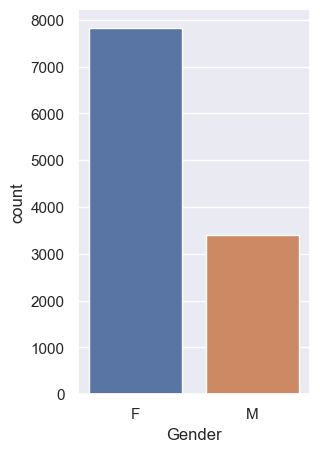

In [68]:
sns.countplot(x = 'Gender',data = df)
sns.set(rc={'figure.figsize':(5,5)})

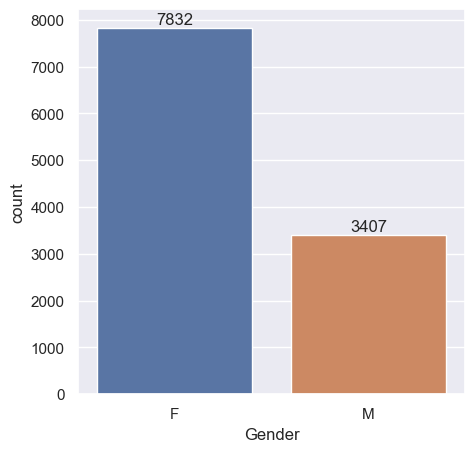

In [69]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

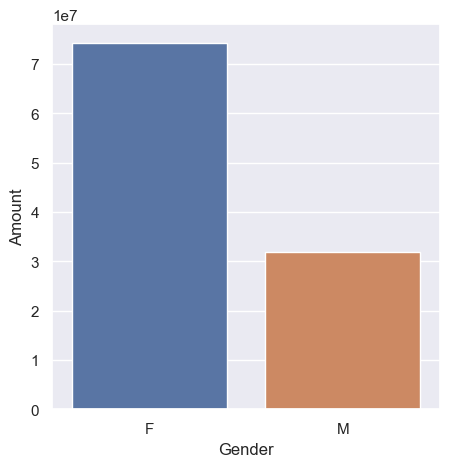

In [70]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

<AxesSubplot:xlabel='Age Group', ylabel='count'>

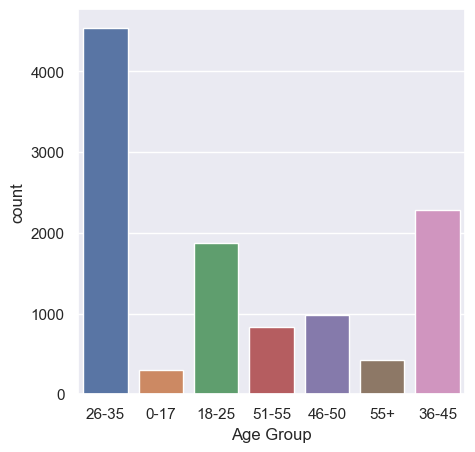

In [72]:
sns.countplot(data = df, x = 'Age Group')

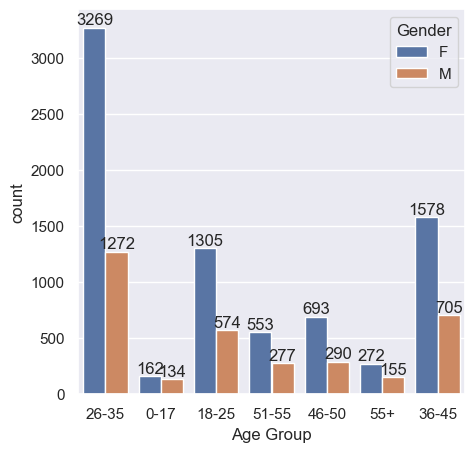

In [73]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

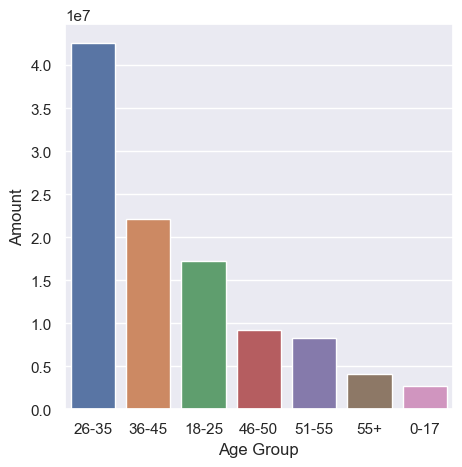

In [76]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

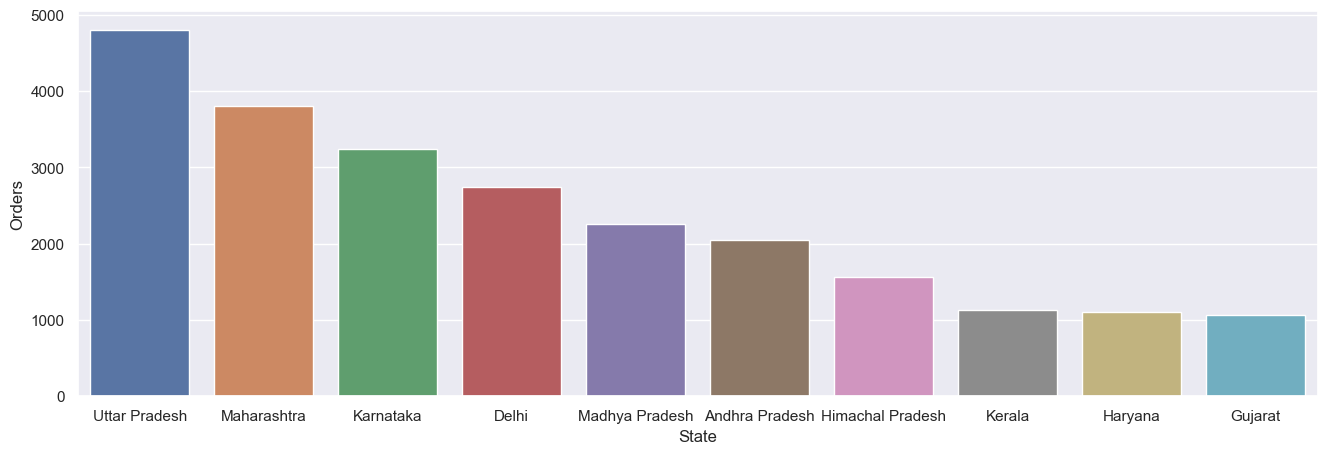

In [78]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

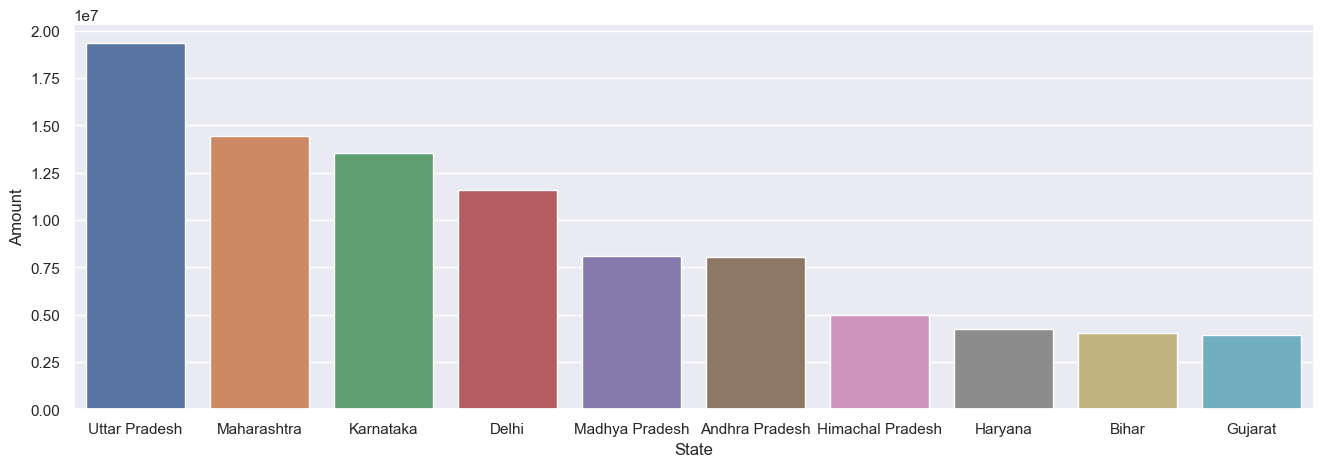

In [80]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Zone 

<AxesSubplot:xlabel='Zone', ylabel='Amount'>

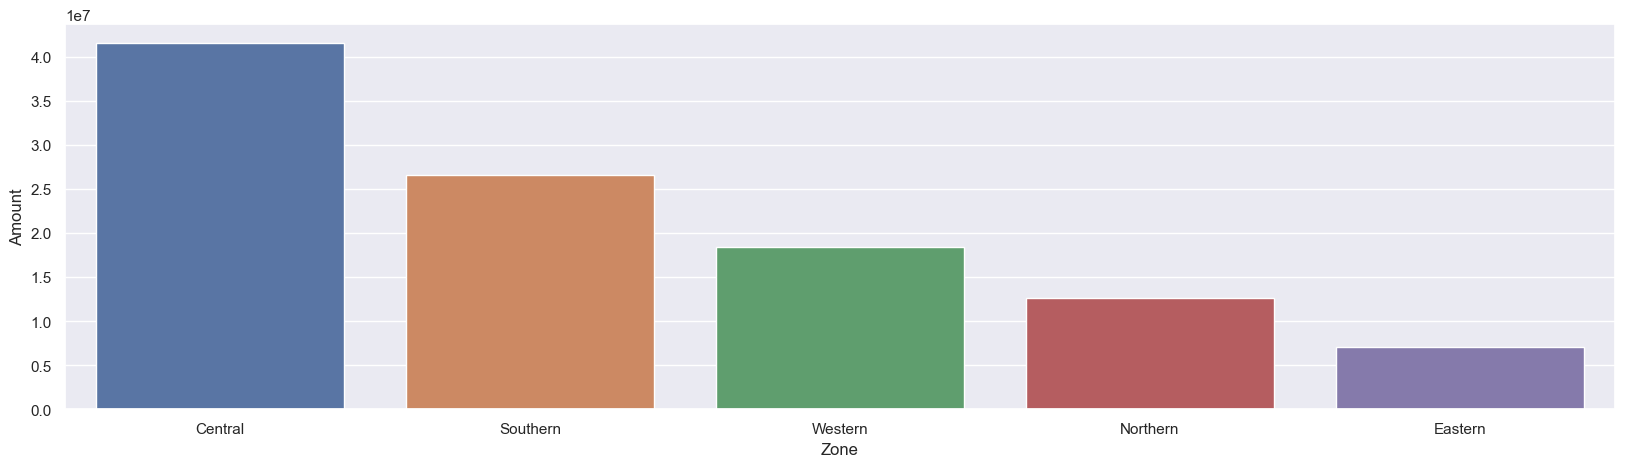

In [108]:
# total amount of sales from each zone
sales_zone = df.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_zone, x='Zone', y='Amount')

*From the above graph we can see that the Central Zone has the maximum amount of sales, followed by the Southern Zone*

### Marital Status

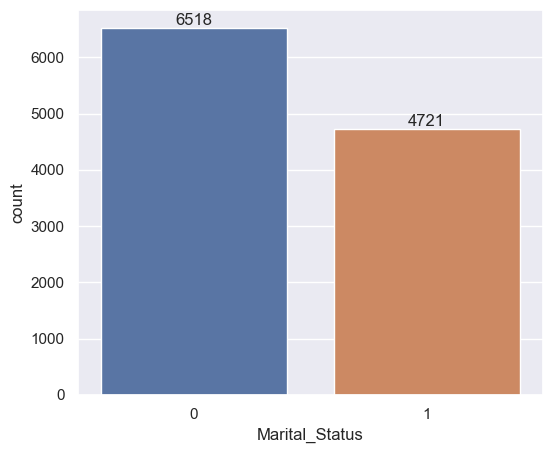

In [83]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

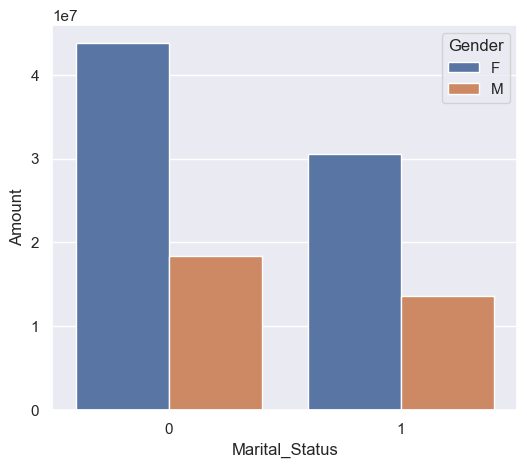

In [88]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

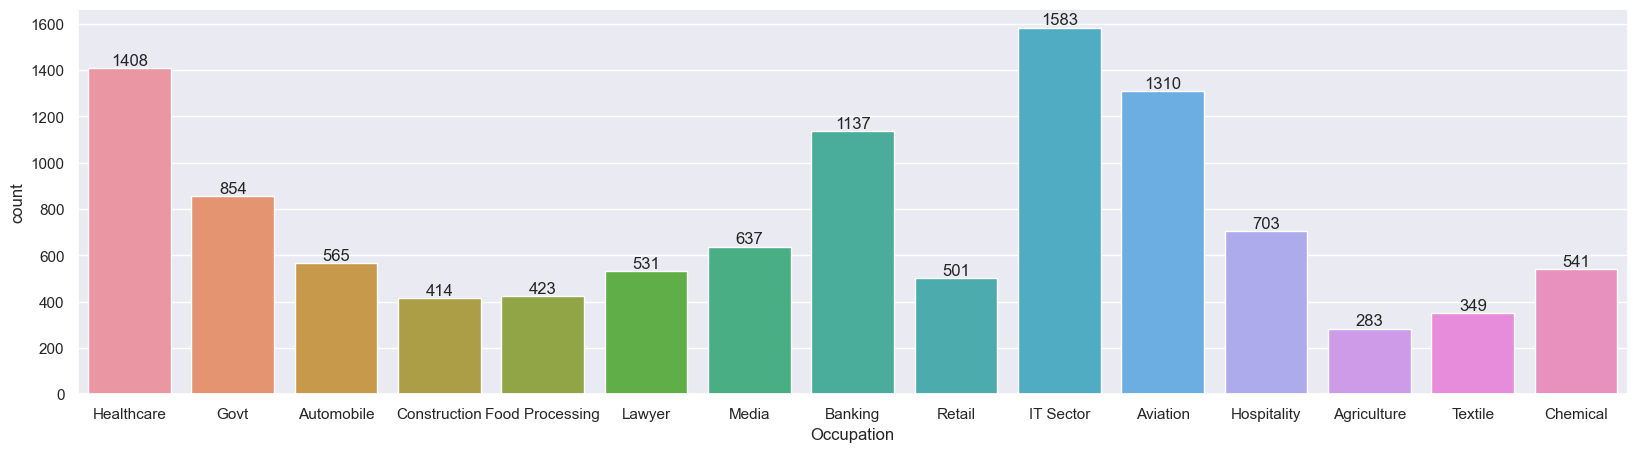

In [89]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

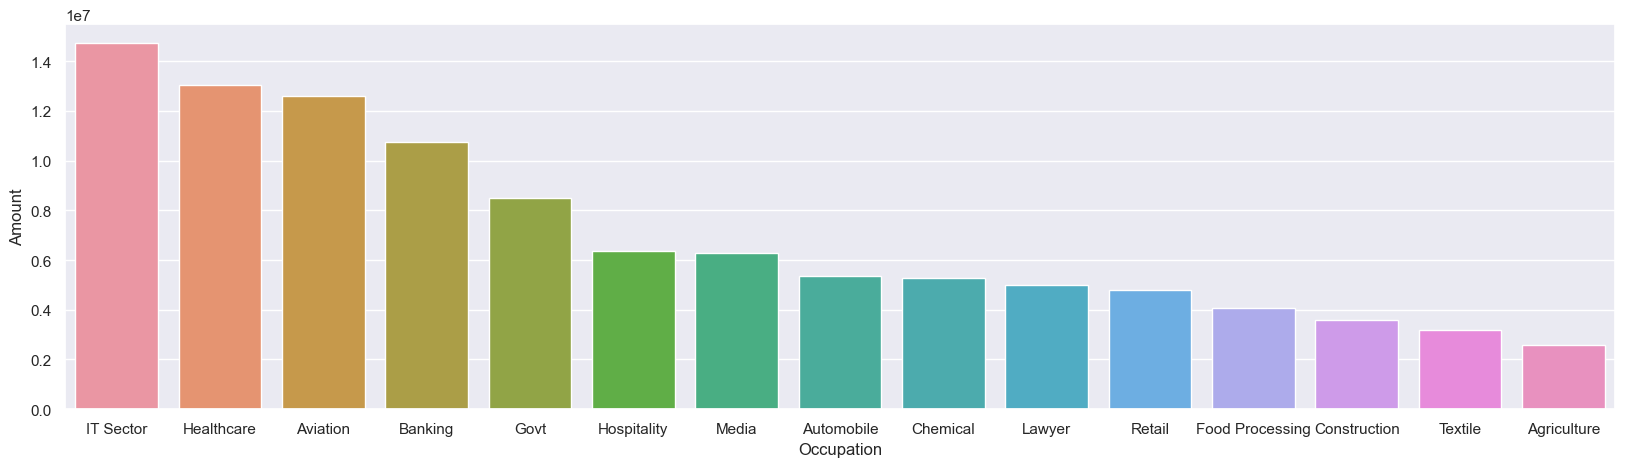

In [93]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

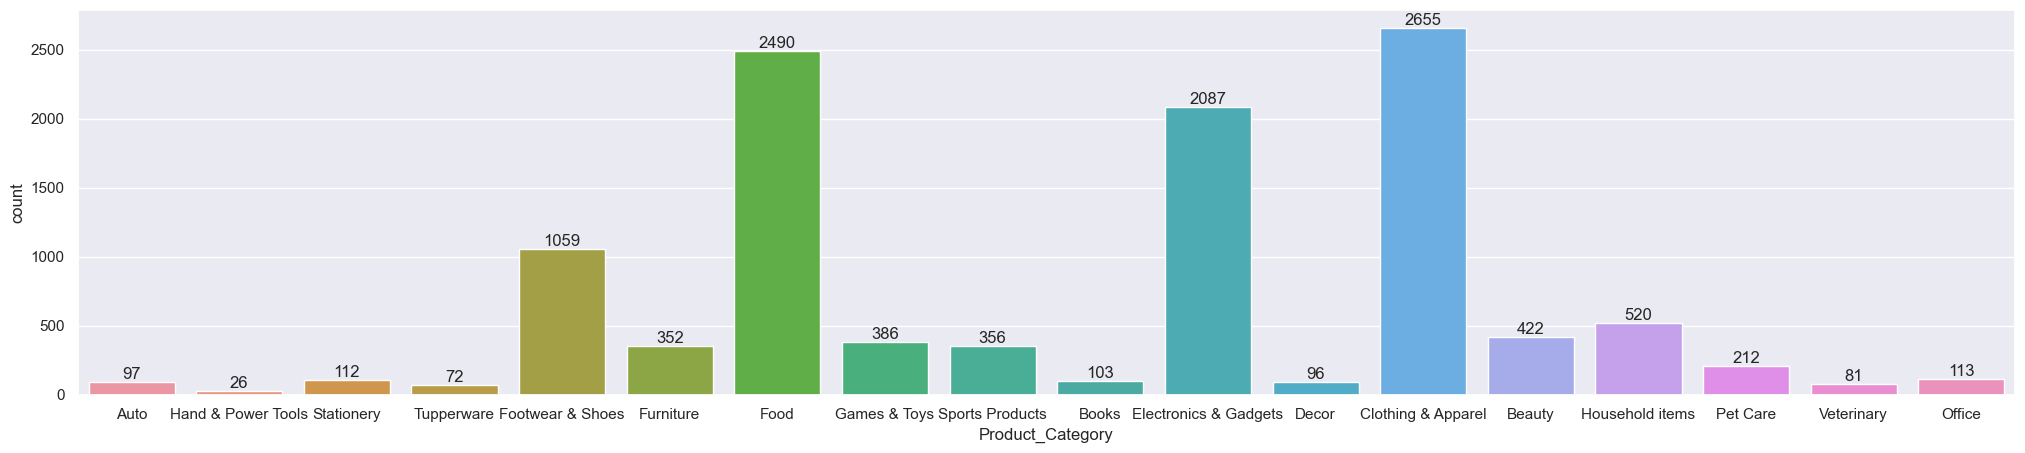

In [96]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

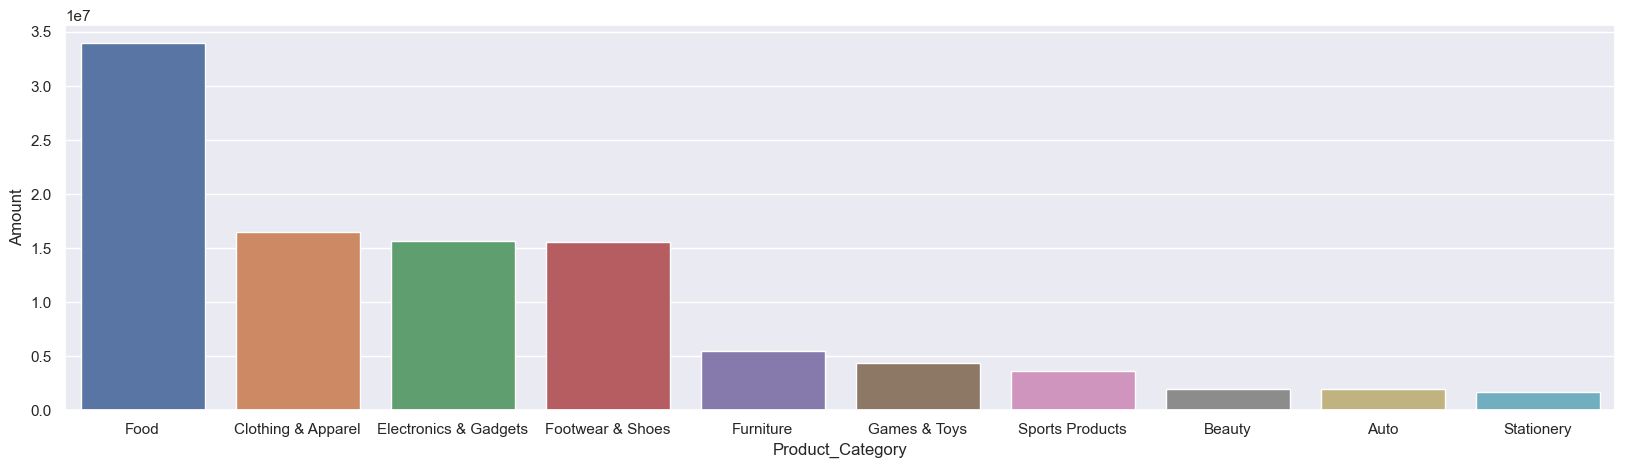

In [99]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the revenue is generated from the sale of products of Food, Clothing and Electronics category*

<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

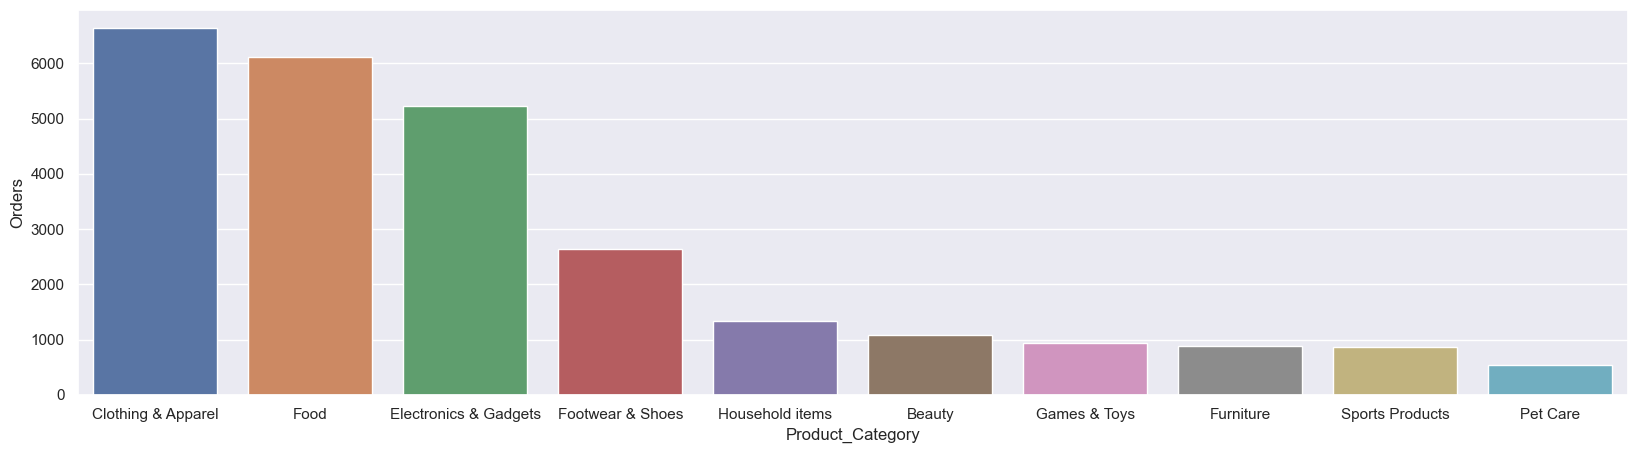

In [102]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Orders')

*From above graphs we can see that most of the orders are from the products of Clothing, Food and Electronics category*

<AxesSubplot:xlabel='Product_ID'>

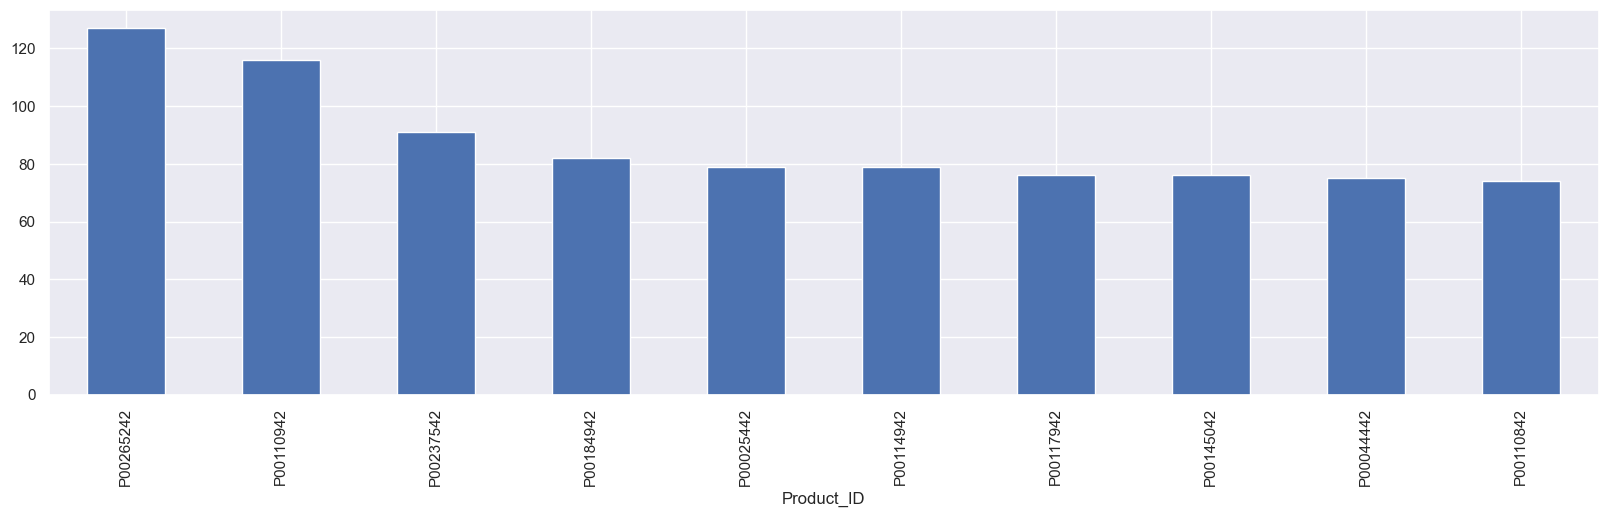

In [105]:
# top 10 most sold products, same as above- instead of Product_Category, sorting is done with respect to Product_ID

fig1, ax1 = plt.subplots(figsize=(20,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### Results of Analysis:

1. Married women, of the age group of 26-35 years are likely to purchase more products in the categories of Food, Clothing & Apparel and Electronics & Gadgets. This category of the population contribute the maximum sales.
2. The States of UP, Maharashtra and Karnataka contribute to the maximum orders and maximum revenue.
3. The people working in IT Sector, Healthcare and Aviation contribute the highest to the Market Revenue.
4. The Central Zone has the maximum amount of sales followed by the Southern Zone.